In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from matplotlib import pyplot as plt
from util import calc_proteome_nosc

In [2]:
# Load amino acid NOSC table
aa_nosc_df = pd.read_csv('../data/aa_nosc.csv').set_index('letter_code')
aa_nosc_df.head()

,full_name,short_name,NC,Formula,NOSC,MW
letter_code,,,,,,
A,Alanine,{ALA},3,C3H7NO2,0.00,89.0935
R,Arginine,{ARG},6,C6H15N4O2+,0.33,174.2017
N,Asparagine,{ASN},4,C4H8N2O3,1.00,132.1184
D,Aspartate,{ASP},4,C4H6NO4−,1.00,133.1032
C,Cysteine,{CYS},3,C3H7NO2S,0.67,121.1590


In [3]:
nosc_df = calc_proteome_nosc('../data/genomes/PCC6803_GT-S.gb', aa_nosc_df)
nosc_df.to_csv('../data/PCC6803_proteome_nosc.csv', index=False)
nosc_df.head()

,locus_tag,aaseq,NOSC,NC,Ce_tot,MW,naa,gene_name,gene_id,inner_membrane,outer_membrane,integral_membrane
0,SYNGTS_0001,MISTTSLFAPVDQDLRLLTDNLKRLVGARHPILGAAAEHLFEAGGK...,-0.159604,1589,-253.61,35725.2280,323,sds,slr0611,False,False,False
1,SYNGTS_0002,MGRLDQDSEGLLLLTSNGKLQHRLAHREFAHQRTYFAQVEGSPTDE...,-0.096367,933,-89.91,21028.6756,185,slr0612,slr0612,False,False,False
2,SYNGTS_0003,MSYLIAVVANRIAAEEAYTTLEQAGFAQKNLTIIGTGYKTADEFGL...,-0.207419,837,-173.61,18296.8257,173,slr0613,slr0613,False,False,False
3,SYNGTS_0004,MSDNLTELSQQLHDASEKKQLTAIAALAEMGEGGQGILLDYLAKNV...,-0.147181,1206,-177.50,26464.6714,233,sll0558,sll0558,False,False,False
4,SYNGTS_0005,MVNTLEKPGFDEIRPGVKTPAKETILTPRFYTTDFDEMAKMDISPN...,-0.149458,1920,-286.96,42152.7024,358,sll1214,sll1214,False,False,False


In [5]:
nosc_df.inner_membrane.any()

False

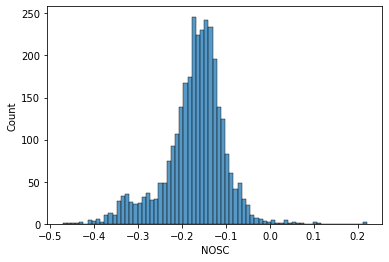

In [4]:
# Histogram of protein NOSC in PCC6803
plt.figure()
sns.histplot(data=nosc_df, x='NOSC')
plt.show()

<AxesSubplot: xlabel='Ce_tot', ylabel='Count'>

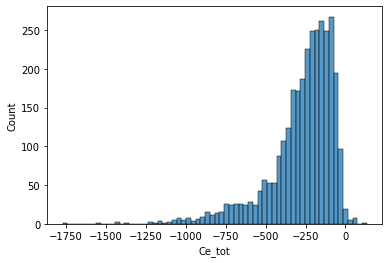

In [5]:
# Hist. of total formal carbon-bound e- on proteins
plt.figure()
sns.histplot(data=nosc_df, x='Ce_tot')

<AxesSubplot: xlabel='MW', ylabel='Count'>

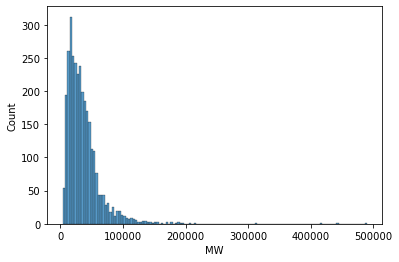

In [6]:
# Hist. of molecular weights
# NB: figure out what these giant proteins are. 
plt.figure()
sns.histplot(data=nosc_df, x='MW')

In [7]:
# filter for "normal-sized" proteins. 
mask = np.logical_and(nosc_df.naa >= 30, nosc_df.naa <= 5000)
all_aas = ''.join(nosc_df[mask].aaseq)
aa_counts_genome = pd.Series(Counter(all_aas))
aa_counts_genome['U'] = 0
aa_freqs_genome = aa_counts_genome / aa_counts_genome.sum()

# reorder to match order in amino acid dataset
aa_freqs_genome = aa_freqs_genome.loc[aa_nosc_df.index].copy()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


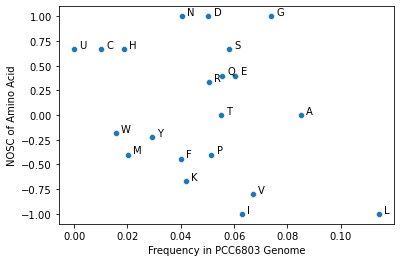

In [8]:
# plot amino acid frequency against NOSC
sns.scatterplot(aa_freqs_genome, aa_nosc_df.NOSC)
for aa in aa_freqs_genome.index:
    xloc = aa_freqs_genome.loc[aa] + 0.002
    yloc = aa_nosc_df.loc[aa].NOSC + 0.01
    plt.annotate(aa, (xloc, yloc))
    
plt.xlabel('Frequency in PCC6803 Genome')
plt.ylabel('NOSC of Amino Acid')
plt.savefig('../output/genome_freq_vs_NOSC.png', facecolor='w', dpi=600)
plt.show()

In [9]:
np.sum(aa_nosc_df.loc[aa_freqs_genome.index].NC*aa_freqs_genome)

4.984792285225781